Importing necessary libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load the dataset

In [11]:
data = pd.read_csv('./Churn_Modelling.csv')
print("Dataset Shape:", data.shape)
data.head()

Dataset Shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Step 2: Distinguish the feature and target set

Dropping irrelevant columns

In [12]:
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = data['Exited']  # 'Exited' column is the target

Encoding categorical features

In [13]:
le_geography = LabelEncoder()
X['Geography'] = le_geography.fit_transform(X['Geography'])

In [14]:
le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])

# Step 3: Split data into training and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize the data

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Initialize and build the neural network model

In [17]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  # Adding dropout to prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

Compile the model

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model Summary

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Early stopping callback

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Train the model

In [21]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7692 - loss: 0.5285 - val_accuracy: 0.8231 - val_loss: 0.4196
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8009 - loss: 0.4450 - val_accuracy: 0.8381 - val_loss: 0.4039
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8146 - loss: 0.4338 - val_accuracy: 0.8487 - val_loss: 0.3921
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8300 - loss: 0.4087 - val_accuracy: 0.8512 - val_loss: 0.3799
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8316 - loss: 0.4042 - val_accuracy: 0.8494 - val_loss: 0.3700
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8353 - loss: 0.3891 - val_accuracy: 0.8500 - val_loss: 0.3642
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8369 - loss: 0.3880 - val_accuracy: 0.8519 - val_loss: 0.3610
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8499 - loss: 0.3697 - val_accuracy: 0.

# Step 6: Model Evaluation

Plot training history

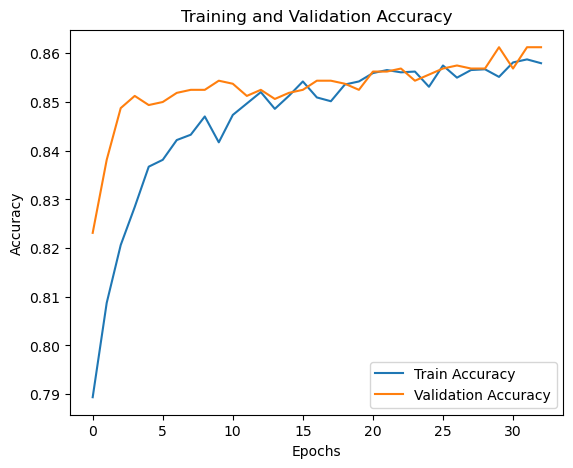

In [22]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

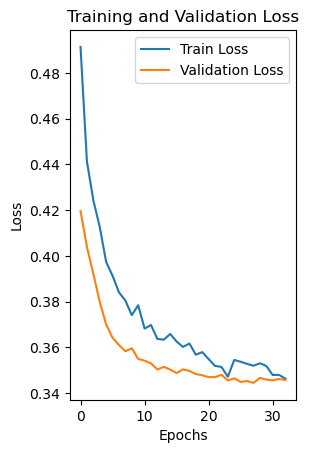

In [23]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Make predictions

In [24]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Calculate accuracy score

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8635


Confusion Matrix

In [26]:
cm = confusion_matrix(y_test, y_pred)

Plot Confusion Matrix

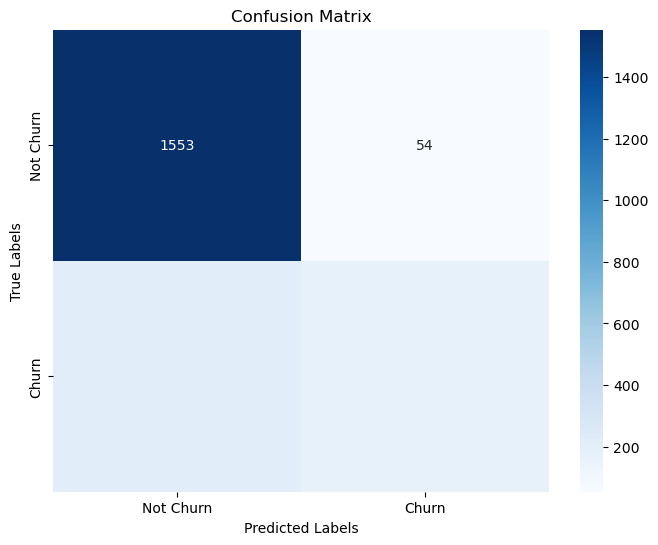

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [28]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



# Make predictions

In [29]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Convert predictions back to the original DataFrame's index

First, create a DataFrame from y_test with matching indices

In [30]:
y_test_df = y_test.reset_index(drop=True)

Create a DataFrame for predictions

In [31]:
predictions_df = pd.DataFrame(y_pred, columns=["Predicted"], index=y_test_df.index)

Combine the predictions with the original test set DataFrame (re-indexed)

In [32]:
results_df = X_test.copy()
results_df = pd.DataFrame(scaler.inverse_transform(results_df), columns=X.columns)
results_df['True Label'] = y_test_df
results_df['Predicted Label'] = predictions_df

Display the updated DataFrame with the true and predicted labels

In [33]:
results_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,True Label,Predicted Label
0,596.0,1.0,1.0,32.0,3.0,96709.07,2.0,0.0,0.0,41788.37,0,0
1,623.0,0.0,1.0,43.0,1.0,0.00,2.0,1.0,1.0,146379.30,0,0
2,601.0,2.0,0.0,44.0,4.0,0.00,2.0,1.0,0.0,58561.31,0,0
3,506.0,1.0,1.0,59.0,8.0,119152.10,2.0,1.0,1.0,170679.74,0,0
4,560.0,2.0,0.0,27.0,7.0,124995.98,1.0,1.0,1.0,114669.79,0,0
